In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## For this project, I analyzed a climate dataset for the Dallas-Fort Worth Metro area in order to show how one can create the following plots in Python primarily using NumPy, Pandas, Matplotlib, and Seaborn:

* Plot 1 - Multi-Faceted Bar Plot
* Plot 2 - Heatmap
* Plot 3 - Histogram
* Plot 4 - Boxplot
* Plot 5 - Proportion Plot - Pie Plot
* Plot 6 - Scatter Plot
* Plot 7 - Line Plot

For each plot I created, I made sure to write a brief explanation of the findings from the dataset that the plots relayed to me with the purpose of helping shed light into the specific types of insights that each plot can offer. 

If you seek to recreate this project or are curious about analyzing the dataset further for yourself, feel free to download it as a CSV from my Github @ github.com/mdorazio33

In [2]:
plt.style.use('ggplot')
sns.set_style('whitegrid')

In [3]:
# path to the dataset CSV on my local machine, change path as needed to reflect its location on your machine. - MD
DFW_temp_csv_filepath = 'C:/projects/DFW_Temperatures.csv'
DFW_temp_csv_filepath

'C:/projects/DFW_Temperatures.csv'

## Loading the dataset with pd.read_csv

In [4]:
temperature_df = pd.read_csv(DFW_temp_csv_filepath)
temperature_df

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,2022,45.8,46.2,58.5,69.5,77.9,86.1,91.8,86.8,80.6,69.1,55.0,50.7
1,2021,47.5,41.1,61.4,64.6,71.8,82.1,84.7,85.1,80.5,72.0,57.7,61.3
2,2020,50.3,49.6,63.4,64.6,73.8,81.9,85.7,86.0,74.7,65.0,60.4,49.0
3,2019,45.8,50.2,55.0,66.0,73.4,79.9,84.6,87.4,85.5,65.5,53.5,50.0
4,2018,45.8,51.1,63.3,61.6,79.0,85.7,88.8,85.2,78.1,66.2,52.5,48.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1903,46.0,43.4,54.1,64.4,69.6,73.3,80.6,82.1,74.8,63.7,53.8,47.4
120,1902,44.0,46.0,57.8,68.7,74.8,83.2,81.6,86.7,72.8,67.2,58.5,45.7
121,1901,50.8,45.0,56.7,62.6,71.5,82.0,85.2,85.5,77.4,70.4,57.3,46.5
122,1900,47.3,46.7,56.3,64.5,71.6,81.9,80.7,81.2,80.6,69.8,57.8,49.3


In [5]:
df_melted = pd.melt(temperature_df, id_vars=['Year'], var_name='Month', value_name='Temperature')
df_melted

,Year,Month,Temperature
0,2022,January,45.8
1,2021,January,47.5
2,2020,January,50.3
3,2019,January,45.8
4,2018,January,45.8
...,...,...,...
1483,1903,December,47.4
1484,1902,December,45.7
1485,1901,December,46.5
1486,1900,December,49.3


In [6]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Plot #1 - Multi-Faceted Bar Plot

For the first plot in this project, I chose to create a Multi-Faceted Bar Plot using the melted dataframe. In order to avoid user warnings, I made sure to import warnings and filter them out using the previous line of code.

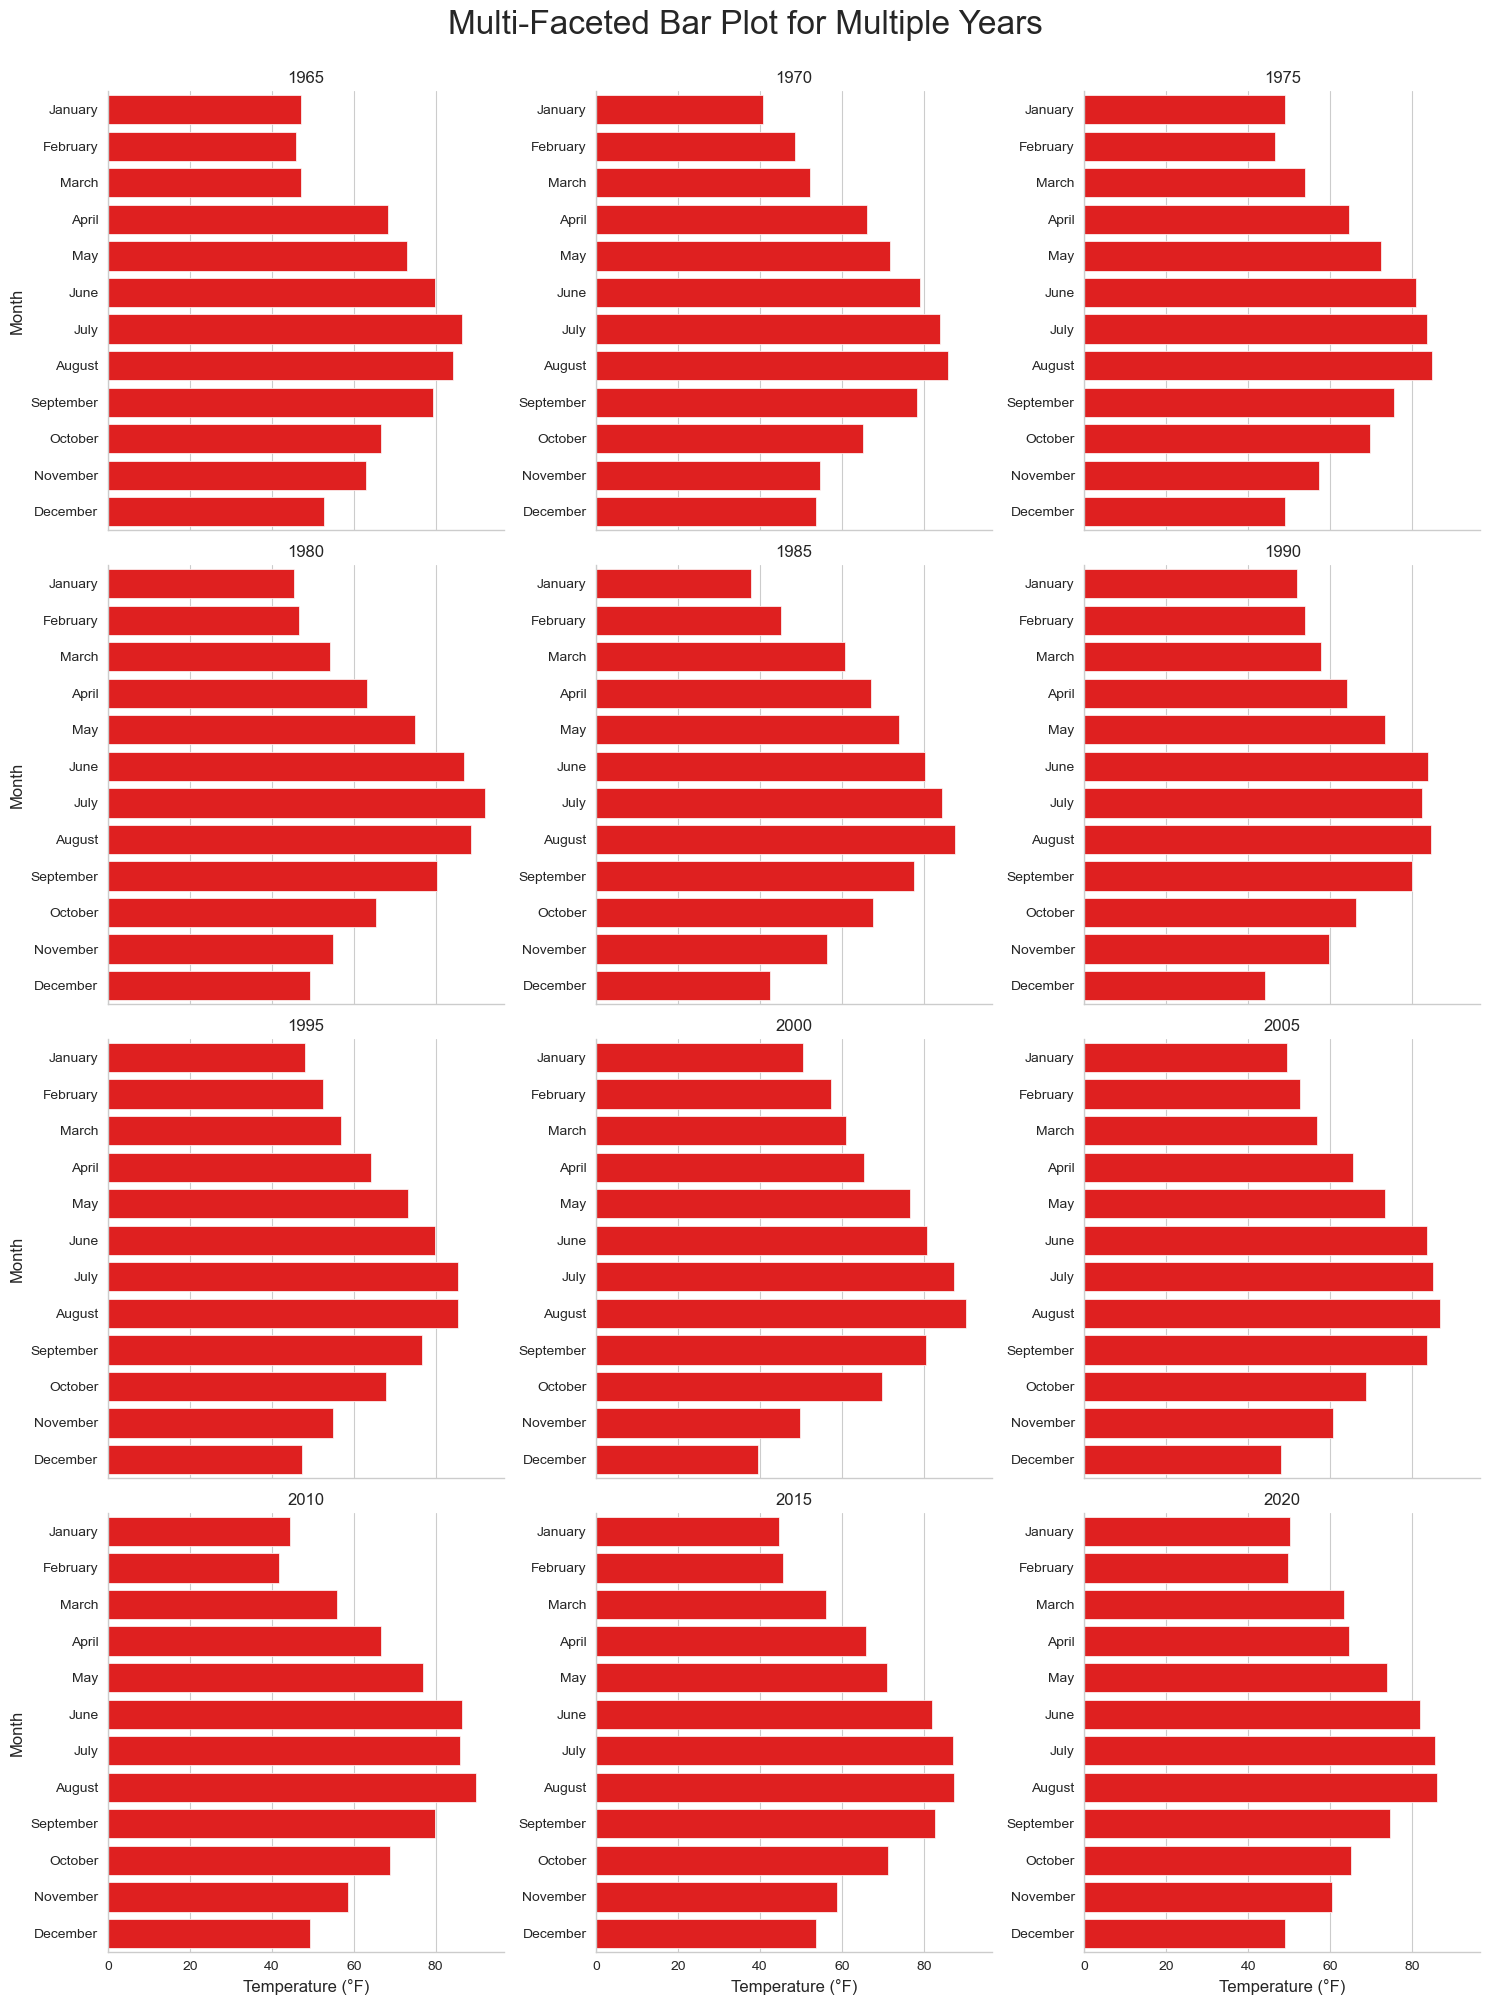

In [7]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year_order = [1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]

g = sns.FacetGrid(df_melted,
                  col='Year',
                  col_order=year_order,
                  col_wrap = 3,
                  height=5,
                  sharey=False)

g.map(sns.barplot, 'Temperature', 'Month', order=month_order, color='red')
g.set_axis_labels('Temperature (°F)', 'Month')
g.set_titles(col_template='{col_name}')
g.fig.suptitle("Multi-Faceted Bar Plot for Multiple Years", fontsize=24, y=1)
g.tight_layout()
plt.show()

## Multi-Faceted Bar Plot - Explanation

For the Multi-Faceted Bar Plot, I was hoping to find out if the Dallas-Fort Worth Metro area had any observable trends when it comes to its general climate/temperature at different months throughout the year. As such, what I was specifically hoping to find/determine was what type of weather someone living in the Dallas-Fort Worth Metro area could generally expect and if there have been any observable deviations with regard to this over the past 55 years.

In order to create this plot, I isolated a time period between 1965 and 2020 at 5-year intervals in order to create a Facet Plot which consisted of 12 individual Barplots.

The graphs showed what I had originally expected in that it is generally colder during the winter months of December, January, and February than it is during the summer months of June, July, and August. Another bit of information that I had learned about the data thanks to this graph was that throughout this time period, there are some Winters that are significantly colder than others. Namely, January of 1985 and December of 2000.

Out of the graphs shown in this Facet Plot, those are the only two months during a winter period in which the average monthly temperature dipped below 40 degrees Fahrenheit. All other winters throughout that period showcase monthly average temperatures that typically sit between 40 degrees and 60 degrees, according to the charts. The only other month that is comparatively colder than the others aside from the aforementioned ones is January of 1970, where the average monthly temperature sits just slightly above 40 degrees.

## Plot #2 - Heatmap

For the second plot in this project, I chose to create a Heatmap for the years between 2000 and 2022.

The steps taken to achieve this included sorting the melted dataframe by month, creating a filtered dataframe for the 2000-2022 time period, grouping by year and month, and then converting that dataframe into a pivot table to create a Heatmap using Matplotlib and Seaborn.

In [8]:
month_order = ['January', 'February', 'March',
               'April', 'May', 'June',
               'July', 'August', 'September',
               'October', 'November', 'December']

df_melted['Month'] = pd.Categorical(df_melted['Month'], categories=month_order, ordered=True)

In [9]:
start_year=2000
end_year=2022
filtered_df = df_melted[(df_melted['Year'] >= start_year) & (df_melted['Year'] <= end_year)]
mym_df = filtered_df.groupby(['Year', 'Month'])['Temperature'].mean().reset_index()
mym_df

,Year,Month,Temperature
0,2000,January,50.6
1,2000,February,57.3
2,2000,March,61.0
3,2000,April,65.3
4,2000,May,76.6
...,...,...,...
271,2022,August,86.8
272,2022,September,80.6
273,2022,October,69.1
274,2022,November,55.0


In [10]:
heatmap_data = mym_df.pivot(index='Month', columns='Year', values='Temperature')
heatmap_data

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Month,,,,,,,,,,,,,,,,,,,,,
January,50.6,42.7,47.6,43.7,48.5,49.5,55.1,42.3,46.9,48.1,...,49.1,45.3,44.5,47.0,51.2,45.8,45.8,50.3,47.5,45.8
February,57.3,50.2,47.0,45.6,45.8,52.6,49.4,49.4,54.0,55.8,...,52.0,47.0,45.7,55.2,60.6,51.1,50.2,49.6,41.1,46.2
March,61.0,51.8,54.8,56.2,61.8,56.7,62.2,63.9,61.0,58.9,...,56.4,55.1,56.1,61.2,65.7,63.3,55.0,63.4,61.4,58.5
April,65.3,67.8,68.4,66.9,66.2,65.5,72.0,62.4,66.5,64.8,...,63.0,66.3,65.8,68.1,69.3,61.6,66.0,64.6,64.6,69.5
May,76.6,74.2,72.0,75.5,74.4,73.5,78.0,74.6,77.0,73.3,...,72.3,74.4,70.9,72.5,75.4,79.0,73.4,73.8,71.8,77.9
June,80.7,80.3,80.1,79.0,79.4,83.6,83.7,81.4,86.5,83.8,...,82.6,82.4,82.1,84.0,82.5,85.7,79.9,81.9,82.1,86.1
July,87.3,86.7,83.2,86.3,83.5,85.1,87.7,83.8,89.0,86.6,...,84.5,83.8,87.1,87.4,86.6,88.8,84.6,85.7,84.7,91.8
August,90.2,84.9,84.7,86.7,81.5,86.8,89.8,87.8,86.7,85.3,...,87.1,86.2,87.3,85.8,84.4,85.2,87.4,86.0,85.1,86.8
September,80.4,74.7,79.6,74.5,78.4,83.7,77.6,81.6,78.5,76.2,...,82.4,80.3,82.7,81.5,80.6,78.1,85.5,74.7,80.5,80.6


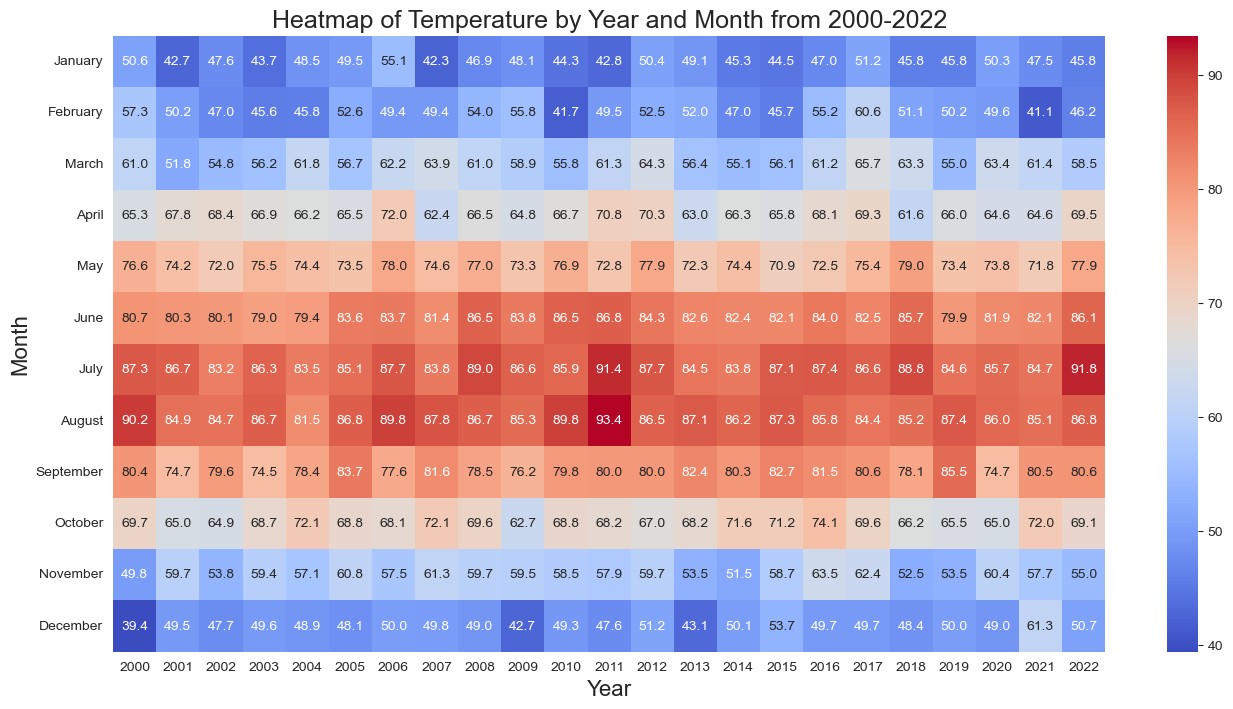

In [11]:
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Heatmap of Temperature by Year and Month from 2000-2022', fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Month", fontsize=16)
plt.show()

## Heatmap - Explanation

When creating the Heatmap, I was hoping to create a visual aid that could help me identify extreme temperatures on both the colder and warmer end of the spectrum for the Dallas-Fort Worth Metro area between the years of 2000 and 2022 in an easier way than the Multi-Faceted Bar Plot had done previously in order to locate especially colder or hotter months during this 22-year time period.

For this plot, I chose to use the coolwarm color map because, in my opinion, its combination of blue and red tones helps the viewer more easily identify hotter and colder temperatures in a more familiar fashion than other color maps that I had previously experimented with.

Following its creation, the Heatmap helped me uncover new insights as well as prove some expectations that I had already held prior. The known expectations that were once again proven were that in the Dallas-Fort Worth Metro area, it is generally hotter during the summer months than it is during the winter. On the other hand, however, some new and valuable insights that were obtained thanks to the Heatmap were the ability to identify temperature extremes in a comfortable-to-view fashion.

Interesting time periods made visible through the Heatmap are December of 2000, July and August of 2011, and July of 2022. These months and years consist of some of the coldest and hottest periods throughout the 2000-2022 dataset. The deep blues and reds really give the viewer areas to focus on, and for me, they made noticing points of interest feel very effortless and intuitive.

## Plot #3 - Histogram

For the third plot in this project, I chose to create a Histogram based on the same melted dataframe grouped by year and month for the 2000-2022 time period, mym_df.

To create this Histogram, I wanted to separate the bins by a bin width of 10 degrees Fahrenheit in order to create a frequency distribution that was easy to follow. In order to do so, I used the give_me_bins function on the mym_df dataframe.

In [12]:
def give_me_bins(s, increment):

    my_min = s.min()
    my_max = s.max()

    min_for_nice_bins = np.floor(my_min / increment) * increment
    max_for_nice_bins = (np.ceil(my_max / increment) + 1) * increment

    bins = np.arange(min_for_nice_bins, max_for_nice_bins, increment)
    bins
    
    return bins

In [13]:
bins = give_me_bins(mym_df['Temperature'], 10)

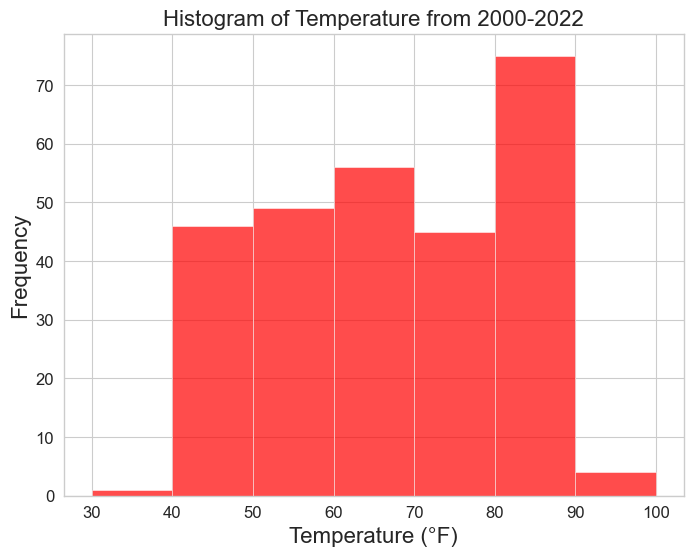

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(mym_df['Temperature'], bins=bins, color='red', alpha=0.7)
plt.xlabel('Temperature (°F)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Histogram of Temperature from 2000-2022', fontsize=16)
plt.show()

## Histogram - Explanation

When creating the Histogram, I wanted a way to conveniently visualize the distribution of the data in a form that was easy to interpret. I was also hoping to find what temperature ranges are the most frequently occurring in the Dallas-Fort Worth Metro area during the 2000-2022 time period.

Based on the plot, we can see that the most frequent temperatures in this area range between 80 and 90 degrees. This can help illustrate to someone who may not know very much about the Dallas-Fort Worth Metro area that it is generally a warmer location when compared to colder metro areas. Additionally, another insight we gain from this is that colder monthly averages between the ranges of 30 and 40 degrees and hotter monthly averages between the ranges of 90 and 100 degrees are less frequently occurring than others.

As far as direct expectations go, however, I did expect there to be a comparatively less frequent amount of extremely hot and extremely cold months when compared to a broader range above 40 and below 90 degrees as was shown on the Heatmap. For that reason, the graph showed what I had originally expected and, in my opinion, helps viewers easily see what temperature ranges were most frequently occurring throughout the 2000-2022 time period.

## Plot #4 - Boxplot

For the fourth plot in this project, I chose to create a Boxplot based on data for the years of 2000, 2005, 2010, and 2015.

To create this Boxplot, I created an isolated dataframe called isolated_df based on the mym_df dataframe for the aforementioned years.

In [15]:
isolated_years = [2000, 2005, 2010, 2015]
isolated_df = mym_df[mym_df['Year'].isin(isolated_years)]
isolated_df

,Year,Month,Temperature
0,2000,January,50.6
1,2000,February,57.3
2,2000,March,61.0
3,2000,April,65.3
4,2000,May,76.6
5,2000,June,80.7
6,2000,July,87.3
7,2000,August,90.2
8,2000,September,80.4
9,2000,October,69.7


Text(0.5, 1.0, 'Boxplot of Temperatures for Multiple Years')

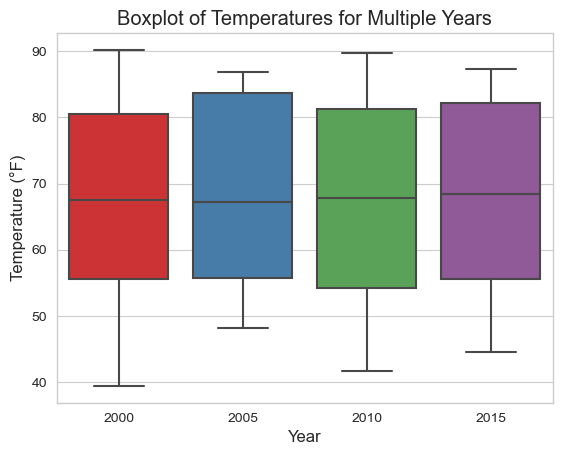

In [16]:
fig, ax = plt.subplots()

custom_palette = sns.color_palette("Set1")
sns.boxplot(data=isolated_df, 
            x='Year',
            y='Temperature',
            palette=custom_palette,
            ax=ax
           )

ax.set_ylabel('Temperature (°F)')
ax.set_title('Boxplot of Temperatures for Multiple Years')

## Boxplot - Explanation

When creating the Boxplot, I wanted to see how the distribution of temperature differed across multiple years in the 2000-2015 time period to see if there were any significant differences over the course of 15 years. I was expecting to see little variation when it came to the median, but that the year 2000 would show a large maximum temperature and a low minimum temperature, as that information was previously shown by the Heatmap (a maximum of 90.2 degrees and a minimum of 39.4 degrees).

What surprised me, however, was how close the median values for temperature truly were to one another. I was also surprised to see that 2010 was also a year with similar max and min temperature values to 2000, with a maximum temperature of 89.8 degrees and a minimum temperature of 41.7 degrees.

The main takeaway from the Boxplot, however, is that temperature in the Dallas-Fort Worth area was generally quite consistent across the 2000-2015 time period based on the interquartile range of the individual Boxplots across 2000, 2005, 2010, and 2015.

## Plot #5 - Proportion Plot - Pie Plot

For the fifth plot in this project, I chose to create a Proportion Plot as a Pie Plot.

Compared to the others, this one was not as intuitive to create. For that reason, what I ended up doing was isolating the year 2010 and classifying temperatures into the following labeled conditions: 'Very Hot', 'Hot', 'Warm', 'Mild', 'Cool', 'Cold', 'Very Cold' based on temperature ranges.

From there, I calculated the proportions and used those to create a Pie Plot.

In [17]:
isolated_year = [2010]
year_2010_df = mym_df[mym_df['Year'].isin(isolated_year)]
year_2010_df

,Year,Month,Temperature
120,2010,January,44.3
121,2010,February,41.7
122,2010,March,55.8
123,2010,April,66.7
124,2010,May,76.9
125,2010,June,86.5
126,2010,July,85.9
127,2010,August,89.8
128,2010,September,79.8
129,2010,October,68.8


In [18]:
conditions = [
    (year_2010_df['Temperature'] >= 91),
    (year_2010_df['Temperature'] >= 81) & (year_2010_df['Temperature'] < 91),
    (year_2010_df['Temperature'] >= 71) & (year_2010_df['Temperature'] < 81),
    (year_2010_df['Temperature'] >= 61) & (year_2010_df['Temperature'] < 71),
    (year_2010_df['Temperature'] >= 51) & (year_2010_df['Temperature'] < 61),
    (year_2010_df['Temperature'] >= 41) & (year_2010_df['Temperature'] < 51),
    (year_2010_df['Temperature'] >= 30) & (year_2010_df['Temperature'] < 41),
]

# Setting our labels
labels = ['Very Hot', 'Hot', 'Warm', 'Mild', 'Cool', 'Cold', 'Very Cold']

In [19]:
# Assigning labels
year_2010_df.loc[:, 'Temperature'] = np.select(conditions, labels, default='Unknown or Out of Range')

In [20]:
# Calculating proportions for the pie chart
category_counts = year_2010_df['Temperature'].value_counts()
total_data_points = len(year_2010_df)
proportions = category_counts / total_data_points

In [21]:
proportions

Temperature
Cold    0.250000
Hot     0.250000
Cool    0.166667
Mild    0.166667
Warm    0.166667
Name: count, dtype: float64

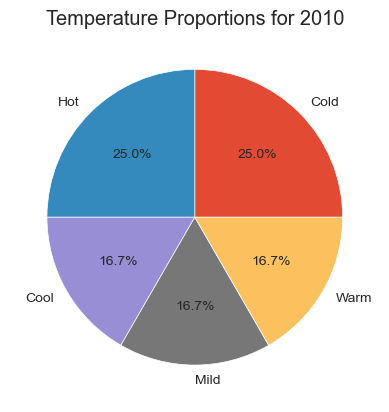

In [22]:
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=0)
plt.title('Temperature Proportions for 2010')
plt.show()

## Proportion Plot - Pie Plot - Explanation

When creating the Proportion Plot, I was really interested to see how the monthly temperature averages would fall into the categories that I had assigned them and to see how they would be reflected for data within any given year. I chose the year 2010, but tested this setup for every available year within the mym_df dataframe and received unique results for each that gave really cool insights.

I expected to get more "Hot" and "Warm" proportions throughout a given year, but found that there are instances in which the Dallas-Fort Worth Metro area can be equal parts "Hot" and "Warm" as it can be "Cold" and "Cool". The reason I chose the year 2010 in particular is because it is one of the years with an essentially even and balanced split between warmer temperatures and cooler temperatures as well as a fair percentage of mild weather at 16.7%.

## Plot #6 - Scatter Plot

For the sixth plot in this project, a Scatter Plot was created to show the average temperature throughout the entire dataset.

Since the dataset reflects temperature data from 1899-2022, those are the years that are reflected.

To create the Scatter Plot, a new dataframe was created called "mean_df" based on the melted dataframe, df_melted.

In [23]:
mean_df = df_melted.groupby('Year')['Temperature'].mean().reset_index()
mean_df

,Year,Temperature
0,1899,63.950000
1,1900,65.641667
2,1901,65.908333
3,1902,65.583333
4,1903,62.766667
...,...,...
119,2018,67.141667
120,2019,66.400000
121,2020,67.033333
122,2021,67.483333


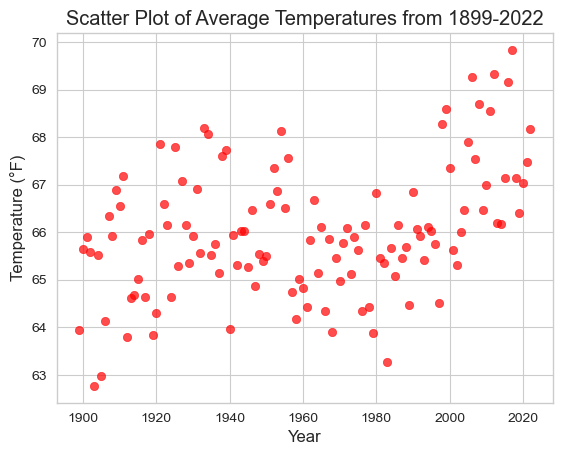

In [24]:
fig, ax = plt.subplots()
sns.scatterplot(data=mean_df, x='Year', y='Temperature', alpha=0.7, color='red', edgecolor=None)

ax.set_ylabel('Temperature (°F)')
ax.set_title('Scatter Plot of Average Temperatures from 1899-2022')
plt.show()

In [25]:
min_temp_year = mean_df.loc[mean_df['Temperature'].idxmin(), 'Year']
min_temp_value = mean_df['Temperature'].min()

max_temp_year = mean_df.loc[mean_df['Temperature'].idxmax(), 'Year']
max_temp_value = mean_df['Temperature'].max()

print(min_temp_year, ':', min_temp_value)
print(max_temp_year, ':', max_temp_value)
print('Temperature Difference:', max_temp_value-min_temp_value)

1903 : 62.76666666666666
2017 : 69.83333333333333
Temperature Difference: 7.06666666666667


## Scatter Plot - Explanation

The Scatter Plot was a fascinating graph that helped show the entire dataset in a more generalized form. Consisting of average yearly temperatures, the Scatter Plot allowed for each year to be reflected as a single comprehensive data point.

For this plot, I was specifically hoping to find out how greatly the minimum average temperature differed from the maximum average temperature throughout the whole dataset.

Due to previous graphs, my expectations were that the difference between the minimum average temperature and the maximum average temperature should not vary too greatly. However, based on the Scatter Plot, we can see that the minimum average temperature is below 63 degrees, while the maximum average temperature is just below 70 degrees.

For the sake of exactness, I used the mean_df to determine that the minimum average temperature was recorded in 1903 at roughly 62.77 degrees, while the maximum average temperature was recorded in 2017 at roughly 69.83 degrees. This results in a temperature difference of just over 7 degrees.

## Plot #7 - Line Plot

Lastly, the seventh plot for this project is the Line Plot. It was created using another dataframe for average temperature, although it was derived from the mym_df dataframe to reflect average temperature values for the years between 2000 and 2022.

In [26]:
mean_df2 = mym_df.groupby('Year')['Temperature'].mean().reset_index()
mean_df2

,Year,Temperature
0,2000,67.358333
1,2001,65.625000
2,2002,65.316667
3,2003,66.008333
4,2004,66.466667
5,2005,67.891667
6,2006,69.258333
7,2007,67.533333
8,2008,68.700000
9,2009,66.475000


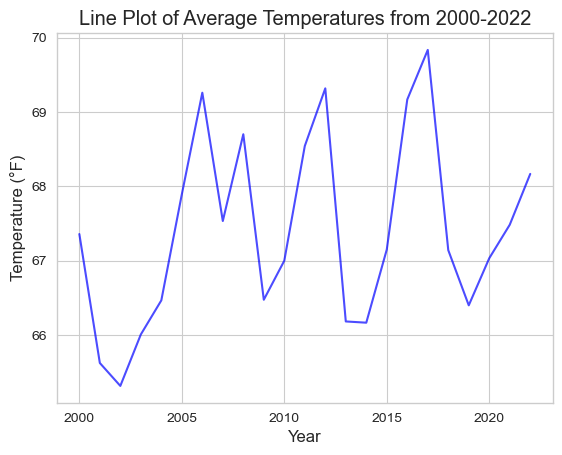

In [27]:
fig, ax = plt.subplots()
sns.lineplot(data=mean_df2, x='Year', y='Temperature', alpha=0.7, color='blue')
ax.set_ylabel('Temperature (°F)')
ax.set_title('Line Plot of Average Temperatures from 2000-2022')

plt.show()

In [28]:
min_temp_year2 = mean_df2.loc[mean_df2['Temperature'].idxmin(), 'Year']
min_temp_value2 = mean_df2['Temperature'].min()

max_temp_year2 = mean_df2.loc[mean_df2['Temperature'].idxmax(), 'Year']
max_temp_value2 = mean_df2['Temperature'].max()

print(min_temp_year2, ':', min_temp_value2)
print(max_temp_year2, ':', max_temp_value2)
print('Temperature Difference:', max_temp_value2-min_temp_value2)

2002 : 65.31666666666666
2017 : 69.83333333333333
Temperature Difference: 4.516666666666666


## Line Plot - Explanation

The Line Plot was similar to the Scatter Plot for me in that I was curious to see how greatly the minimum average temperature differed from the maximum average temperature, albeit in a more narrow timeframe.

Based on previous graphs analyzing the 2000-2022 period, I expected the temperature difference to be small, or at the very least, smaller than the almost 7-degree difference observed between the minimums and maximums between 1899 and 2022. This assumption proved to be correct, as the resulting difference turned out to be roughly 4.52 degrees between the minimum average temperature recorded in 2002 of 65.32 degrees and the maximum average temperature recorded in 2017 of 69.83 degrees.

As a result, this graph showed what I had expected in that the observed temperature difference between the average minimum and maximum temperature throughout a more condensed time window was smaller for this dataset than a comparatively larger one.